## POINT ESTIMATES

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:


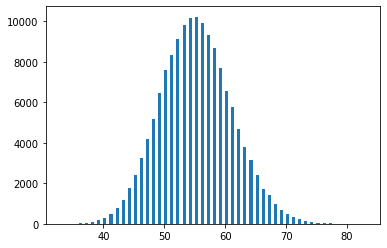

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=20, mu=35, size=150000)
plt.hist(population_ages1 , bins=100);

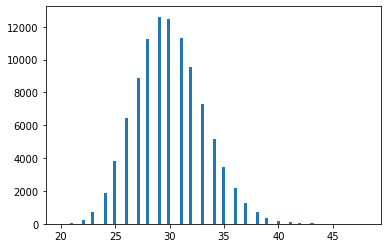

In [ ]:
population_ages2 = stats.poisson.rvs(loc=20, mu=10, size=100000)
plt.hist(population_ages2 , bins=100);

45.002372

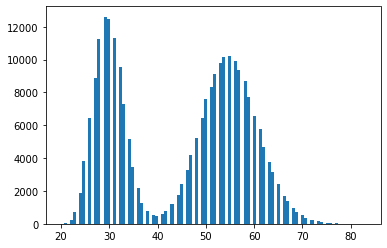

In [ ]:
population_ages = np.concatenate((population_ages1, population_ages2))
plt.hist(population_ages , bins=100);
population_ages.mean()

In [ ]:
# Sample 500 values
np.random.seed(10)
sample_ages = np.random.choice(a = population_ages, size=500)

#Show the sample Mean
print (sample_ages.mean())

population_ages.mean() - sample_ages.mean()   # Check difference between means

44.378


0.624372000000001


Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. 

This illustrates an important point: 

    we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. 

For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [ ]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )


other proportion estimate:
0.099
asian proportion estimate:
0.099
white proportion estimate:
0.379
black proportion estimate:
0.231
hispanic proportion estimate:
0.192


## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range.

For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).

Let's calculate a 95% confidence for our mean point estimate:

In [ ]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(43.70306406882683, 45.34293593117317)


We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.

the confidence interval we calculated captures the true population mean of 44.52

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [ ]:
np.random.seed(10)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(50):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

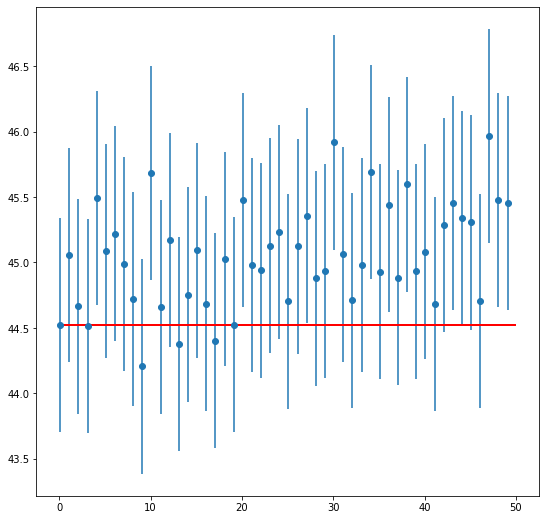

In [ ]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 50, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=50,
           y=44.523, 
           linewidth=2.0,
           color="red");

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## RECAP

Estimating population parameters through sampling is a simple, yet powerful form of inference. Point estimates combined with error margins let us create confidence intervals that capture the true population parameter with high probability.

## EXERCISE QUESTIONS



1.   In a sample of 659 parents with toddlers, about 85%, stated they use a car seat for all travel with their toddler. From these results, a 95% confidence interval was provided, going from about 82.3% up to 87.7%. Identify the parameters and plot the graph.
2.   Download the dataset from [heart disease](https://www.kaggle.com/ronitf/heart-disease-uci). import it using the command 


```
# data = pd.read_csv(heart.csv)
```
CI = 95%

* Is the population proportion of females with heart disease the same as the population proportion of males with heart disease? 
* The dataset has a ‘chol’ column that contains the cholesterol level. Calculate the confidence interval of the mean cholesterol level of the female population.

## SIGNIFICANCE LEVEL TESTING

1. According to a large poll from last year, about 85% of houses in Porto have access to high-speed internet. Marco wondered if the proportion had changed and took a random sample of 80 houses and found that 75 had access to high-speed internet. He wants to use this sample data to test if the proportion actually changed. Assuming that the conditions for inference were met, what would you conclude about the proportion of houses with high-speed internet considering a significance level of 1%?

Marta owns a fruit store and receives watermelons weekly. The supplier states that they are supposed to weigh 1kg. Marta decides to weigh a random sample of 100 watermelons and finds a mean weight of 850g and a standard deviation of 200g. She wants to use this sample data to test if the mean is smaller than the one claimed by the supplier and renegotiate their contract if this is the case. Assuming that the conditions for inference were met, what should Marta do (consider a significance level of 5%)?